## Explore Differences in Transport Regime Sensitivity Indices

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import matplotlib.patches as mpatches

In [4]:
transports = ['dt','dr','at','ar']
SIs_dict = {}
for transport in transports:
    total_Si_early = pd.read_csv(f'/Users/williamtaylor/Documents/Github/ADE-Sensitivity-Analysis/results/total_Si_early_{transport}.csv', index_col=0)
    first_Si_early = pd.read_csv(f'/Users/williamtaylor/Documents/Github/ADE-Sensitivity-Analysis/results/first_Si_early_{transport}.csv', index_col=0)
    second_Si_early = pd.read_csv(f'/Users/williamtaylor/Documents/Github/ADE-Sensitivity-Analysis/results/second_Si_early_{transport}.csv', index_col=0)
    total_Si_peak = pd.read_csv(f'/Users/williamtaylor/Documents/Github/ADE-Sensitivity-Analysis/results/total_Si_peak_{transport}.csv', index_col=0)
    first_Si_peak = pd.read_csv(f'/Users/williamtaylor/Documents/Github/ADE-Sensitivity-Analysis/results/first_Si_peak_{transport}.csv', index_col=0)
    second_Si_peak = pd.read_csv(f'/Users/williamtaylor/Documents/Github/ADE-Sensitivity-Analysis/results/second_Si_peak_{transport}.csv', index_col=0)
    total_Si_late = pd.read_csv(f'/Users/williamtaylor/Documents/Github/ADE-Sensitivity-Analysis/results/total_Si_late_{transport}.csv', index_col=0)
    first_Si_late = pd.read_csv(f'/Users/williamtaylor/Documents/Github/ADE-Sensitivity-Analysis/results/first_Si_late_{transport}.csv', index_col=0)
    second_Si_late = pd.read_csv(f'/Users/williamtaylor/Documents/Github/ADE-Sensitivity-Analysis/results/second_Si_late_{transport}.csv', index_col=0)

    SIs_dict[transport] = {
        'total_Si_early': total_Si_early,
        'first_Si_early': first_Si_early,
        'second_Si_early': second_Si_early,
        'total_Si_peak': total_Si_peak,
        'first_Si_peak': first_Si_peak,
        'second_Si_peak': second_Si_peak,
        'total_Si_late': total_Si_late,
        'first_Si_late': first_Si_late,
        'second_Si_late': second_Si_late
        }
    indices = ['early','peak','late']
    types = ['total','first','second']
    names= ['theta', 'rho_b','dispersivity','lamb','alpha','kd']

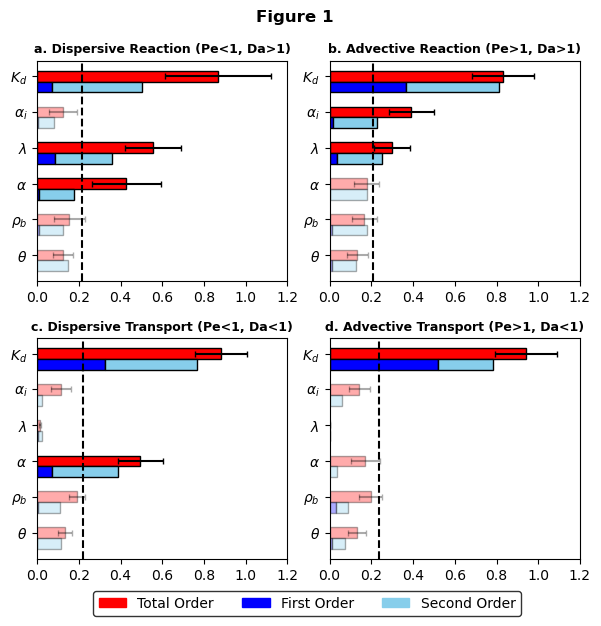

In [128]:
plt.style.use('default')
scenarios = ['dr','ar','dt','at']
positions = np.arange(1, 7, 1)
names = ['theta','rho_b','alpha','lamb','dispersivity','kd']
greek_labels = [r'$\theta$', r'$\rho_b$', r'$\alpha$', r'$\lambda$', r'$\alpha_i$', r'$K_d$']
titles = ['a. Dispersive Reaction (Pe<1, Da>1)','b. Advective Reaction (Pe>1, Da>1)','c. Dispersive Transport (Pe<1, Da<1)','d. Advective Transport (Pe>1, Da<1)']
time = 'late'
fig, axes = plt.subplots(2,2,figsize=(6,6))
axes = axes.flatten()
for j,scenario in enumerate(scenarios):
    st_values = {name: SIs_dict[scenario]['total_Si_'+str(time)]['ST'][name] for name in names}
    threshold = 0.25*np.max(list(st_values.values()))
    for i, name in enumerate(names):
       if st_values[name] < threshold:    
           axes[j].barh(positions[i], SIs_dict[scenario]['total_Si_'+str(time)]['ST'][name], height=0.3, color='red', edgecolor='black', alpha=0.33)
           axes[j].errorbar(SIs_dict[scenario]['total_Si_'+str(time)]['ST'][name], positions[i], 
                     xerr=SIs_dict[scenario]['total_Si_'+str(time)]['ST_conf'][name], fmt='none', ecolor='black', capsize=2, alpha=0.33)
       else:
           axes[j].barh(positions[i], SIs_dict[scenario]['total_Si_'+str(time)]['ST'][name], height=0.3, color='red', edgecolor='black', alpha=1)
           axes[j].errorbar(SIs_dict[scenario]['total_Si_'+str(time)]['ST'][name], positions[i], 
                     xerr=SIs_dict[scenario]['total_Si_'+str(time)]['ST_conf'][name], fmt='none', ecolor='black', capsize=2, alpha=1)
       # First order
       if st_values[name] < threshold:
           axes[j].barh(positions[i] - 0.3, SIs_dict[scenario]['first_Si_'+str(time)]['S1'][name], color='blue', height=0.3, edgecolor='black', alpha=0.33)
       else:
           axes[j].barh(positions[i] - 0.3, SIs_dict[scenario]['first_Si_'+str(time)]['S1'][name], color='blue', height=0.3, edgecolor='black', alpha=1)

       # Second order
       second_order_contributions = SIs_dict[scenario]['second_Si_'+str(time)]['S2']
       second_order_conf_ints = SIs_dict[scenario]['second_Si_'+str(time)]['S2_conf']
       second_order_sum = second_order_contributions.loc[second_order_contributions.index.map(lambda x: name in x)].sum()
       
       bottom_position = SIs_dict[scenario]['first_Si_'+str(time)]['S1'][name]

       if st_values[name] < threshold:  
           axes[j].barh(positions[i] - 0.3, 
                     second_order_sum,
                     left=bottom_position,
                     color='skyblue',
                     height=0.3,
                     edgecolor='black',
                     alpha=0.33)
       else:
           axes[j].barh(positions[i] - 0.3, 
                     second_order_sum,
                     left=bottom_position,
                     color='skyblue',
                     height=0.3,
                     edgecolor='black',
                     alpha=1)
           
    axes[j].axvline(threshold, c='black', linestyle='--')
    axes[j].set_xlim(0,1.2)
    axes[j].set_title(titles[j], fontweight='bold', fontsize=9)
    axes[j].set_yticks(positions)
    axes[j].set_yticklabels(greek_labels)

handles = [
    mpatches.Patch(color='red', label='Total Order'),
    mpatches.Patch(color='blue', label='First Order'),
    mpatches.Patch(color='skyblue', label='Second Order')
]
fig.legend(handles=handles, loc='center', edgecolor='black', ncol=3, bbox_to_anchor=(0.52, -0.01))
fig.suptitle('Figure 1', fontweight='bold')
plt.tight_layout()
plt.show()

### Motivation
Figure 1 shows the late-time tailing sensitivity indices (SIs) for the four transport regimes, which I made in support of the main manuscript. I did not catch the difference previously, but combining the four regimes into one plot showed that some of the SIs differ in ways that are not immediately explainable. Chiefly, why is it that advection reaction (panel b) is the only scenario where $\alpha_i$ (dispersivity) has substantial influence? This is surprising for two reasons:
1. Advective Reaction has a small range of sampled dispersivity values, and the dispersion-dominated scenarios (panels a,c) show minimal influence from $\alpha_i$.
2. I would expect trends to appear in twos due to experimental setup. This seems to be the case for $\lambda$ and $\alpha$, so why not $\alpha_i$ as well?

### Steps
1. Plot some example breakthrough curves with varying dispersivity values to ensure the model is behaving as expected. These should be under AR and non-AR scenario definitions.
2. Plotting BTCs can help explain the difference between AR and DR SIs too.
3. Compare late-time tailing variance between scenarios.
4. Plot simulation length metrics.

In [3]:
import sys
import os
notebook_dir = os.getcwd() # need to format this way for jupyter notebooks
parent_dir = os.path.abspath(os.path.join(notebook_dir, ".."))
sys.path.append(parent_dir)
import model

In [5]:
times = np.linspace(0,20,1000)

L = 2
x = 2
ts = 0.25
v = 1
Co = 1
theta = 0.7
rho_b = 1.5
dispersivity = 0.001
lamb = 0
alpha = 1
kd = 1

concentrations, adaptive_times = model.concentration_106_new_adaptive_extended(times,theta,rho_b,dispersivity,lamb,alpha,kd, Co=Co, v=v, ts=ts, L=L, x=x)
plt.figure(figsize=(4,4))
plt.plot(adaptive_times, concentrations, c='black')
plt.xlabel('Time')
plt.ylabel('Concentration (Co/C)')
#plt.ylim(0,0.1)
#plt.xlim(0,25)
plt.title('Low-dispersion BTC', fontweight='bold')
plt.tight_layout()
plt.show()

NameError: name 'np' is not defined

My theory for why $\alpha_i$ does not have much influence in the dispersion-dominated systems is that the parameter range is large enough at the lowest bound that any larger value does not make a meaningful difference in late-time tailing behavior. I'll test this by plotting BTCs and late time tailing values for a range of $\alpha_i$ values, while holding other parameters constant. For the dispersive-transport and advective transport scenarios below, I'm using the same range for each (in log-scale) that we did in the sensitivity analysis. By holding the other parameters constant, we're performing a 'local' sensitivity analysis. I'm also only sampling from 10 evenly spaced values in the respective range instead of ~100,000.

High dispersion tailing variance: 0.001
Low dispersion tailing variance: 0.272


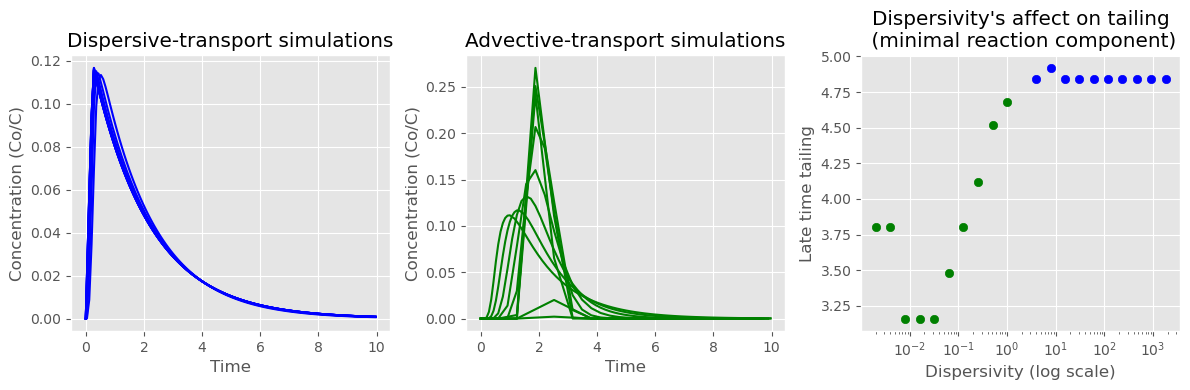

In [11]:
plt.style.use('ggplot')
times = np.linspace(0,20,500)

L = 2
x = 2
ts = 0.25
v = 1
Co = 1
theta = 0.5
rho_b = 1.0
high_dispersivity = np.linspace(np.log10(4),np.log10(1800),10) # create sample range in log-space
low_dispersivity = np.linspace(np.log10(2e-3),np.log10(10e-1),10) # create sample range in log-space
lamb = 0.01
alpha = 0
kd = 0

fig, ax = plt.subplots(1,3,figsize=(12,4))
ax = ax.flatten()
# simulate BTCs for high-dispersion scenarios first
tailings = []
for i,d in enumerate(high_dispersivity):
    concentrations, adaptive_times = model.concentration_106_new_adaptive_extended(times,theta,rho_b,10**d,lamb,alpha,kd, Co=Co, v=v, ts=ts, L=L, x=x) # ensure to convert d back to real space
    ax[0].plot(adaptive_times, concentrations, c='blue')

    _, _, tailing = model.calculate_metrics(adaptive_times, concentrations)
    tailings.append(tailing)
ax[2].scatter(10**high_dispersivity, tailings, c='blue')
print(f'High dispersion tailing variance: {np.array(tailings).var():.3f}')

ax[0].set_xlabel('Time')
ax[0].set_ylabel('Concentration (Co/C)')
ax[0].set_title('Dispersive-transport simulations')

# simulate BTCs for low-dispersion scenarios next
tailings = []
for i,d in enumerate(low_dispersivity):
    concentrations, adaptive_times = model.concentration_106_new_adaptive_extended(times,theta,rho_b,10**d,lamb,alpha,kd, Co=Co, v=v, ts=ts, L=L, x=x) # ensure to convert d back to real space
    ax[1].plot(adaptive_times, concentrations, c='green')

    _, _, tailing = model.calculate_metrics(adaptive_times, concentrations)
    tailings.append(tailing)
    
ax[2].scatter(10**low_dispersivity, tailings, c='green')
print(f'Low dispersion tailing variance: {np.array(tailings).var():.3f}')

ax[1].set_xlabel('Time')
ax[1].set_ylabel('Concentration (Co/C)')
ax[1].set_title('Advective-transport simulations')

ax[2].set_xlabel('Dispersivity (log scale)')
ax[2].set_ylabel('Late time tailing')
ax[2].set_xscale('log')
ax[2].set_title('Dispersivity\'s affect on tailing\n (minimal reaction component)')

plt.tight_layout()
plt.show()

My hunch about dispersivity appears correct - after a certain point changing dispersion doesn't seem to affect the tailing behavior. However, in this case, the advective scenario does show much difference in variance either. These results are consistent with Figure 1 where we see $\alpha_i$ having minimal influence in the DT and AT scenarios. What happens if we add a reaction component?

High dispersion tailing variance: 0.000
Low dispersion tailing variance: 0.721


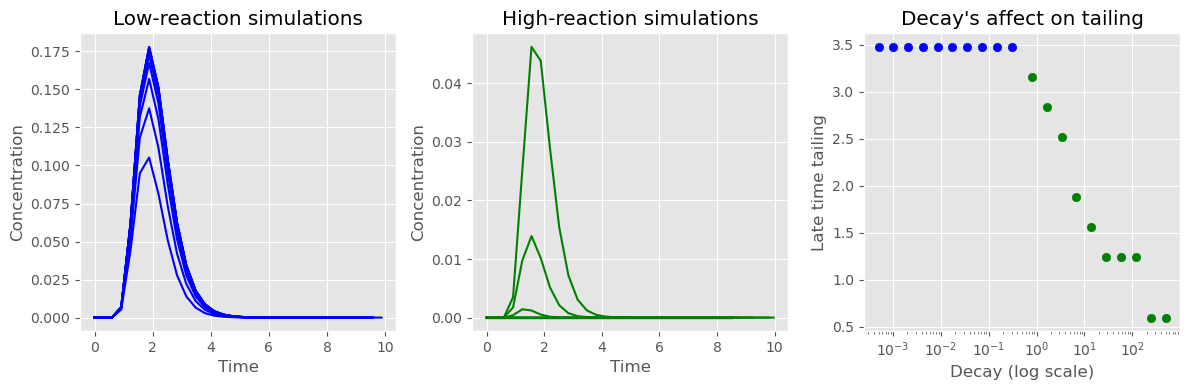

In [23]:
plt.style.use('ggplot')
times = np.linspace(0,20,500)

L = 2
x = 2
ts = 0.25
v = 1
Co = 1
theta = 0.5
rho_b = 1.0
d = 0.1
low_lamb = np.linspace(np.log10(5e-4),np.log10(3e-1),10) # create sample range in log-space
high_lamb = np.linspace(np.log10(8e-1),np.log10(500),10) # create sample range in log-space
alpha = 0.01
kd = 0.01

fig, ax = plt.subplots(1,3,figsize=(12,4))
ax = ax.flatten()
# simulate BTCs for high-dispersion scenarios first
tailings = []
for i,lamb in enumerate(low_lamb):
    concentrations, adaptive_times = model.concentration_106_new_adaptive_extended(times,theta,rho_b,d,10**lamb,alpha,kd, Co=Co, v=v, ts=ts, L=L, x=x) # ensure to convert d back to real space
    ax[0].plot(adaptive_times, concentrations, c='blue')

    _, _, tailing = model.calculate_metrics(adaptive_times, concentrations)
    tailings.append(tailing)
ax[2].scatter(10**low_lamb, tailings, c='blue')
print(f'High dispersion tailing variance: {np.array(tailings).var():.3f}')

ax[0].set_xlabel('Time')
ax[0].set_ylabel('Concentration')
ax[0].set_title('Low-reaction simulations')

# simulate BTCs for low-dispersion scenarios next
tailings = []
for i,lamb in enumerate(high_lamb):
    concentrations, adaptive_times = model.concentration_106_new_adaptive_extended(times,theta,rho_b,d,10**lamb,alpha,kd, Co=Co, v=v, ts=ts, L=L, x=x) # ensure to convert d back to real space
    ax[1].plot(adaptive_times, concentrations, c='green')

    _, _, tailing = model.calculate_metrics(adaptive_times, concentrations)
    tailings.append(tailing)
    
ax[2].scatter(10**high_lamb, tailings, c='green')
print(f'Low dispersion tailing variance: {np.array(tailings).var():.3f}')
  
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Concentration')
ax[1].set_title('High-reaction simulations')

ax[2].set_xlabel('Decay (log scale)')
ax[2].set_ylabel('Late time tailing')
ax[2].set_xscale('log')
ax[2].set_title('Decay\'s affect on tailing')

plt.tight_layout()
plt.show()

When we add a reaction value we see that the late time tailing behavior changes much more with varying dispersivity, but only on the low end (green). This confirms the Sobol Indices for Figure 1: $\alpha_i$ (dispersivity) has little impact in the DT,DR, and AT scenarios. In the AR scenario, it has a larger influence on tailing behavior. But why is this happening?

Transport scenario dt variance: 29231.471089042927
Transport scenario dr variance: 642.2093059481725
Transport scenario at variance: 32834.422986940204
Transport scenario ar variance: 9324.198033808445


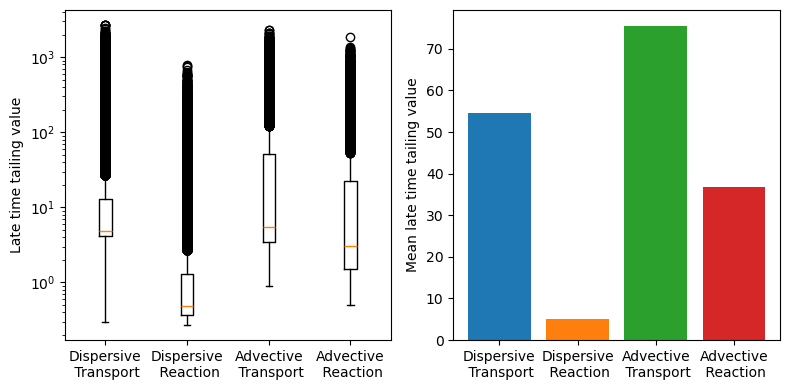

In [164]:
handles = ('Dispersive\n Transport','Dispersive\n Reaction','Advective\n Transport','Advective\n Reaction')
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax = ax.flatten()
for i,transport in enumerate(transports):
    # read in metrics
    metrics = pd.read_csv(f'/Users/williamtaylor/Documents/Github/ADE-Sensitivity-Analysis/results/metrics_{transport}.csv', index_col=0).to_numpy()
    print(f'Transport scenario {transport} variance: {metrics[:,2].var()}')
    # read in btc data
    #with open(f'/Users/williamtaylor/Documents/Github/ADE-Sensitivity-Analysis/results/btc_data_{transport}.json', 'r') as f:
    #    btc_data = json.load(f)

    ax[0].boxplot(metrics[:,2], positions=[i])


    ax[1].bar(i, metrics[:,2].mean())

ax[0].set_xticks(range(len(transports)))
ax[0].set_xticklabels(handles)
ax[0].set_ylabel('Late time tailing value')
ax[0].set_yscale('log')

ax[1].set_xticks(range(len(transports)))
ax[1].set_xticklabels(handles)
ax[1].set_ylabel('Mean late time tailing value')

plt.tight_layout()
plt.show()

The reaction-dominated regimes generally have a shorter simulation time (and tailing time) than their Peclet companion. This makes sense, as the simulations run their course reaction removes more of the injected mass. So as applied to our $\alpha_i$ question, the longer scenarios leave more room for other transport processes to dominate, namely, sorption and desorption. However, we saw earlier that the dispersion-dominated scenarios are dealing with such a high dispersivity sampling range that the change in sampled value doesn't impact the tailing behavior much.

## Summary

1. $\alpha_i$ values in dispersive-reaction and dispersive-transport scenarios are sampled in a range where further increases no longer influence late-time tailing, indicating there is an effect threshold for dispersion to shape late-time tailing response.
2. Advective-transport has a longer simulation period, which allows sorption to take on an even larger role in delaying solute travel.
3. The relatively shorter simulations of advective-reaction leave more room for early dispersion effects to shape the late-time tailing response.